# Homework w04d03


Import Python Libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, recall_score, precision_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in the Wisconsin Breast Cancer Dataset

### Assign the columns

The attributes below will be the columns of the dataset.
  
Attribute                     

1. Sample code number [subject ID]
1. Class
1. Cell nucleus mean radius
1. Cell nucleus SE radius
1. Cell nucleus worst radius
1. Texture mean
1. Texture SE
1. Texture worst
1. Perimeter mean
1. Perimeter SE
1. Perimeter worst
1. Area mean
1. Area SE
1. Area worst
1. Smoothness mean
1. Smoothness SE
1. Smoothness worst
1. Compactness mean
1. Compactness SE
1. Compactness worst
1. Concavity mean
1. Concavity SE
1. Concavity worst
1. Concave points mean
1. Concave points SE
1. Concave points worst
1. Symmetry mean
1. Symmetry SE
1. Symmetry worst
1. Fractal dimension mean
1. Fractal dimension SE
1. Fractal dimension worst
1. The column names are taken from the dataset info file.

For more information check out the information file: wdbc.names.

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

In [3]:
column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']


df.columns = column_names

df.head()

,id,malignant,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Split the dataset into target (malign) and data features (everything except id and malignant)

In [4]:
X = df.iloc[:,2:]
y = df.malignant
X.head()

,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Recode the target variable with 1 for M (malign) and 0 for B (benign)

In [5]:
y = y.map(lambda x: 0 if x == "B" else 1)

### How many cases of malign carcinoms are in the dataset?

In [6]:
y.sum()

212

### Set kNN's k value to 3 and fit the data

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Find the model accuracy (score)

In [8]:
model.score(X, y)

0.95606326889279436

### Split into training and test data and calculate the test score for k in the range from 1 to 100

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scores_test = []
predictions = []
for k in range(1,101):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    predict = model.predict(X_test) 
    predictions.append(predict)
    scores_test.append(model.score(X_test,y_test))
[(i+1,scores_test[i]) for i in range(len(scores_test)) if scores_test[i] == max(scores_test)]

[(11, 0.97660818713450293)]

### Perform 5-fold cross validation for k in the range from 1 to 100. Which k performs best? Plot the mean accuracy from the cross validation versus k.

In [10]:
score_list = []
score_means = []
accuracy_list = []
precision_list = []
f1_list = []
recall_list = []
for k in range(1,101):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    predicted = cross_val_predict(model,X,y, cv=5)
    accuracy_list.append(accuracy_score(y, predicted))
    precision_list.append(precision_score(y,predicted))
    f1_list.append(f1_score(y,predicted))
    recall_list.append(recall_score(y,predicted))
    score_list.append(scores)
    score_means.append(np.mean(scores))

In [11]:
# Best k
[(i+1,score_means[i]) for i in range(len(score_means)) if score_means[i] == max(score_means)]

[(14, 0.93519045786841093)]

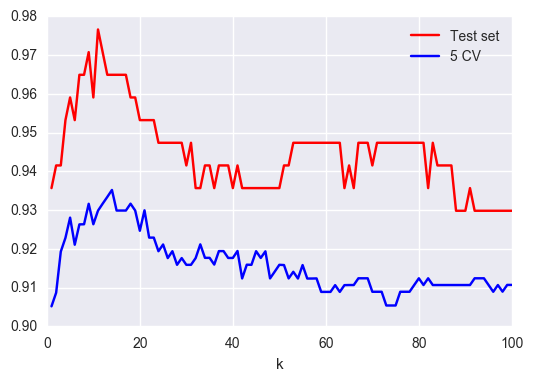

In [12]:
line_1, = plt.plot(range(1,101),scores_test,c='r')
line_2, = plt.plot(range(1,101),score_means,c='b')
plt.xlabel('k')
plt.legend([line_1, line_2], ['Test set','5 CV'],loc='upper right')
plt.show()

### Bonus: plot other scores like F1, recall and precision obtained in cross validation versus k

1. Accuracy = (True Positives + True Negatives) / Total
1. F1-Score = 2 (Precision $\cdot$ Recall) / (Precision + Recall)
1. Recall = True Positives / (True Positives + False Negatives)
1. Precision = True Positives / (True Positives + False Positives)

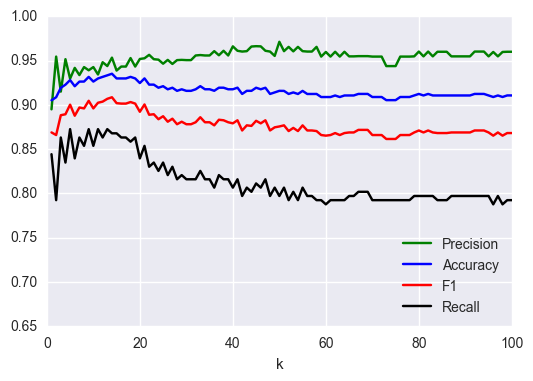

In [13]:
line_1, = plt.plot(range(1,101),precision_list,c='g',label='Precision')
line_2, = plt.plot(range(1,101),score_means,c='b',label='Accuracy')
line_3, = plt.plot(range(1,101),f1_list,c='r',label='F1')
line_4, = plt.plot(range(1,101),recall_list,c='k',label='Recall')

plt.legend([line_1, line_2, line_3, line_4], ['Precision','Accuracy','F1','Recall'],loc='lower right')
plt.xlabel('k')
plt.ylim([0.65,1])
plt.show()